# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

from datetime import datetime

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)

635
['nizhniy odes', 'bethel', 'naryan-mar', 'arraial do cabo', 'rikitea', 'bambous virieux', 'severo-kurilsk', 'san cristobal', 'busselton', 'hobart', 'winslow', 'zhicheng', 'nouadhibou', 'cabo san lucas', 'abengourou', 'los llanos de aridane', 'saskylakh', 'lebu', 'hofn', 'hermanus', 'saint-philippe', 'mount gambier', 'tiznit', 'marinette', 'ushuaia', 'ostrovnoy', 'gat', 'kapaa', 'xining', 'sentyabrskiy', 'nikolskoye', 'mataura', 'tomar', 'albany', 'abu samrah', 'husavik', 'te anau', 'lorengau', 'raga', 'kodiak', 'thompson', 'kavieng', 'ust-nera', 'cherskiy', 'airai', 'bulgan', 'teluknaga', 'sobolevo', 'bredasdorp', 'teguise', 'nizhniy tsasuchey', 'otane', 'puerto ayora', 'mahibadhoo', 'mys shmidta', 'vaini', 'kachikau', 'bluff', 'tiksi', 'georgetown', 'show low', 'port alfred', 'nurlat', 'talnakh', 'hami', 'lompoc', 'coos bay', 'xuddur', 'sitka', 'vostok', 'richards bay', 'klyuchi', 'tasiilaq', 'illoqqortoormiut', 'iqaluit', 'san vicente', 'tuktoyaktuk', 'butaritari', 'dikson', 'new

In [3]:

cities_columns = ["City Name","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"] 
city_pd = pd.DataFrame(columns=cities_columns) 


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:

base_url = "http://api.openweathermap.org/data/2.5/weather?"


api_call_counter=1
sets_counter=1
index=0

print(f"Begin Data Retrieval")
print("-----------------------")
    
for cityName in cities:
    full_url = base_url + "appid=" + api_key + "&q=" + cityName 
    response = requests.get(full_url)
    results = response.json()
   
    try: 
         
        print(f'Processing Record {api_call_counter} of Set {sets_counter} | {cityName}' )    
               
        temp_kelvin = results["main"]["temp_max"] 
        temp_Faren = round(((temp_kelvin - 273.15) * 9/5 + 32),2) 
        
        humidity=results["main"]["humidity"]
        
        latitude=results["coord"]["lat"]
         
        longitude=results["coord"]["lon"]
        
        cloudiness= results["clouds"]["all"]
       
        wind_speed= results["wind"]["speed"]
        
        country= results["sys"]["country"]
       
        date=results["dt"]
        
        city_pd.loc[index, "City Name"] = cityName
        
        city_pd.loc[index, "Max Temp"] = temp_Faren
        
        city_pd.loc[index, "Humidity"] = humidity
        
        city_pd.loc[index, "Lat"] = latitude
        
        city_pd.loc[index, "Lng"] = longitude
        
        city_pd.loc[index, "Cloudiness"] = cloudiness
        
        city_pd.loc[index, "Wind Speed"] = wind_speed
        
        city_pd.loc[index, "Country"] = country
        
        city_pd.loc[index, "Date"] = date
        
        index=index+1
        
    except (KeyError, IndexError):
        print("City not found... skipping.")
       
    api_call_counter = api_call_counter+1
    if api_call_counter > 50: 
        api_call_counter = 1 
        sets_counter = sets_counter + 1

print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")

Begin Data Retrieval
-----------------------
Processing Record 1 of Set 1 | nizhniy odes
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | naryan-mar
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | bambous virieux
Processing Record 7 of Set 1 | severo-kurilsk
Processing Record 8 of Set 1 | san cristobal
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | winslow
Processing Record 12 of Set 1 | zhicheng
Processing Record 13 of Set 1 | nouadhibou
Processing Record 14 of Set 1 | cabo san lucas
Processing Record 15 of Set 1 | abengourou
Processing Record 16 of Set 1 | los llanos de aridane
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | hofn
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | saint-philippe
Processing Record 22 of Set 1 | mount gambier
Processin

Processing Record 35 of Set 4 | gwadar
Processing Record 36 of Set 4 | sorong
Processing Record 37 of Set 4 | mogadishu
Processing Record 38 of Set 4 | chuy
Processing Record 39 of Set 4 | okhotsk
Processing Record 40 of Set 4 | nalut
Processing Record 41 of Set 4 | aklavik
Processing Record 42 of Set 4 | kirakira
Processing Record 43 of Set 4 | angatuba
Processing Record 44 of Set 4 | dinsor
City not found... skipping.
Processing Record 45 of Set 4 | goma
Processing Record 46 of Set 4 | chokurdakh
Processing Record 47 of Set 4 | ponta do sol
Processing Record 48 of Set 4 | dubenskiy
City not found... skipping.
Processing Record 49 of Set 4 | san patricio
Processing Record 50 of Set 4 | hinche
Processing Record 1 of Set 5 | afmadu
City not found... skipping.
Processing Record 2 of Set 5 | leamington
Processing Record 3 of Set 5 | dunedin
Processing Record 4 of Set 5 | bubaque
Processing Record 5 of Set 5 | bandundu
Processing Record 6 of Set 5 | papara
Processing Record 7 of Set 5 | ro

Processing Record 24 of Set 8 | ancud
Processing Record 25 of Set 8 | tumannyy
City not found... skipping.
Processing Record 26 of Set 8 | havelock
Processing Record 27 of Set 8 | clyde river
Processing Record 28 of Set 8 | margate
Processing Record 29 of Set 8 | bend
Processing Record 30 of Set 8 | grand-lahou
Processing Record 31 of Set 8 | leningradskiy
Processing Record 32 of Set 8 | samarai
Processing Record 33 of Set 8 | babynino
Processing Record 34 of Set 8 | the valley
Processing Record 35 of Set 8 | ambunti
Processing Record 36 of Set 8 | waingapu
Processing Record 37 of Set 8 | plouzane
Processing Record 38 of Set 8 | juneau
Processing Record 39 of Set 8 | isangel
Processing Record 40 of Set 8 | dawson creek
Processing Record 41 of Set 8 | puerto baquerizo moreno
Processing Record 42 of Set 8 | linqiong
Processing Record 43 of Set 8 | sao desiderio
Processing Record 44 of Set 8 | ambulu
Processing Record 45 of Set 8 | arlit
Processing Record 46 of Set 8 | sakaraha
Processing

Processing Record 15 of Set 12 | plettenberg bay
Processing Record 16 of Set 12 | naze
Processing Record 17 of Set 12 | batagay
Processing Record 18 of Set 12 | nizwa
Processing Record 19 of Set 12 | nsanje
Processing Record 20 of Set 12 | tezu
Processing Record 21 of Set 12 | melo
Processing Record 22 of Set 12 | korla
City not found... skipping.
Processing Record 23 of Set 12 | high rock
Processing Record 24 of Set 12 | taoudenni
Processing Record 25 of Set 12 | kulhudhuffushi
Processing Record 26 of Set 12 | vallenar
Processing Record 27 of Set 12 | muros
Processing Record 28 of Set 12 | ondorhaan
City not found... skipping.
Processing Record 29 of Set 12 | pochutla
Processing Record 30 of Set 12 | tabuk
Processing Record 31 of Set 12 | alice springs
Processing Record 32 of Set 12 | yablonovo
Processing Record 33 of Set 12 | najran
Processing Record 34 of Set 12 | nome
Processing Record 35 of Set 12 | calabozo
Processing Record 36 of Set 12 | mehran
Processing Record 37 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_pd.head()

,City Name,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nizhniy odes,95,RU,1561606866,54,63.64,54.86,55.49,1.62
1,bethel,90,US,1561606491,68,60.79,-161.76,68,7.2
2,naryan-mar,98,RU,1561606728,56,67.67,53.09,54.59,3.66
3,arraial do cabo,0,BR,1561606621,88,-22.97,-42.02,71.6,2.1
4,rikitea,0,PF,1561606571,81,-23.12,-134.97,74.21,4.76


In [6]:
city_pd.count()

City Name     575
Cloudiness    575
Country       575
Date          575
Humidity      575
Lat           575
Lng           575
Max Temp      575
Wind Speed    575
dtype: int64

In [7]:
city_pd.to_csv("WeatherDetails.csv", encoding='utf-8', index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

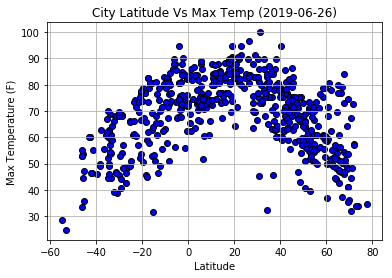

In [8]:
plt.scatter(city_pd["Lat"], city_pd["Max Temp"], marker="o", facecolors="blue", edgecolors="black")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title(f"City Latitude Vs Max Temp ({(pd.datetime.now().date())})")
plt.grid()
plt.savefig("../Images/Temp_Lat.png")
plt.show()

#### Latitude vs. Humidity Plot

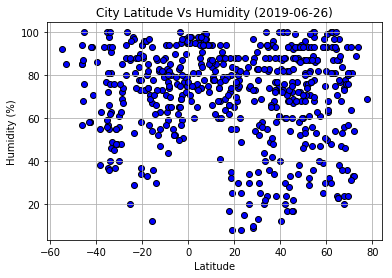

In [9]:
plt.scatter(city_pd["Lat"], city_pd["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title(f"City Latitude Vs Humidity ({(pd.datetime.now().date())})")
plt.grid()
plt.savefig("../Images/Humid_Lat.png")
plt.show()

#### Latitude vs. Cloudiness Plot

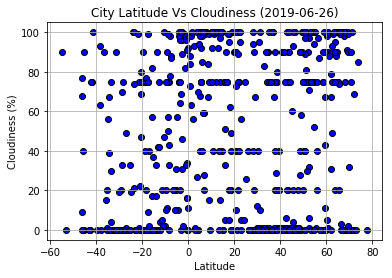

In [10]:
plt.scatter(city_pd["Lat"], city_pd["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title(f"City Latitude Vs Cloudiness ({(pd.datetime.now().date())})")
plt.grid()
plt.savefig("../Images/Cloud_Lat.png")
plt.show()

#### Latitude vs. Wind Speed Plot

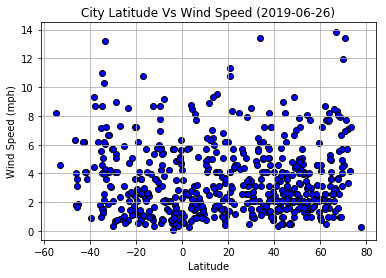

In [11]:
plt.scatter(city_pd["Lat"], city_pd["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title(f"City Latitude Vs Wind Speed ({(pd.datetime.now().date())})")
plt.grid()
plt.savefig("../Images/Wind_Lat.png")
plt.show()